In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

y = mx + b


b = 5

In [5]:
y_true = (0.5*x_data) + 5 + noise

In [6]:
import pandas as pd

In [11]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [12]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [15]:
my_data = pd.concat([x_df,y_df],axis=1)

In [17]:
my_data.head()

,X Data,Y
0,0.00000,5.060740
1,0.00001,7.448684
2,0.00002,5.667317
3,0.00003,5.122877
4,0.00004,3.802526


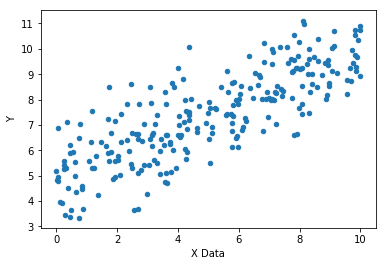

In [19]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y')

In [20]:
batch_size = 8


In [21]:
np.random.randn(2)

array([-0.48437422, -0.55201117])

In [40]:
m = tf.Variable(0.48)
b = tf.Variable(0.55)

In [41]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [42]:
y_model = m*xph + b

In [43]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [45]:
 init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m , model_b = sess.run([m,b])
        

In [54]:
model_m

0.4571562

In [57]:
model_b

4.988938

In [58]:
y_hat = x_data*model_m + model_b

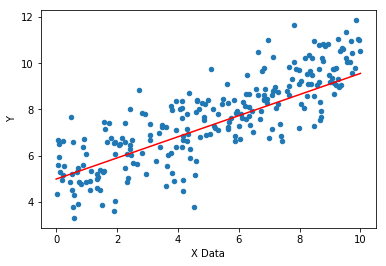

In [59]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

## TF ESTIMATOR

In [60]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [61]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7n1z94_8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc90f1d6128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
from sklearn.model_selection import train_test_split


In [64]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size = 0.3,random_state=101)

In [66]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [67]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=False)

In [68]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=None,shuffle=False)

In [69]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp7n1z94_8/model.ckpt.
INFO:tensorflow:loss = 473.75342, step = 1
INFO:tensorflow:global_step/sec: 566.226
INFO:tensorflow:loss = 28.232115, step = 101 (0.178 sec)
INFO:tensorflow:global_step/sec: 641.528
INFO:tensorflow:loss = 30.355305, step = 201 (0.156 sec)
INFO:tensorflow:global_step/sec: 696.334
INFO:tensorflow:loss = 2.7713327, step = 301 (0.144 sec)
INFO:tensorflow:global_step/sec: 638.721
INFO:tensorflow:loss = 13.351587, step = 401 (0.156 sec)
INFO:tensorflow:global_step/sec: 580.641
INFO:tensorflow:loss = 11.85498, step = 501 (0.175 sec)
INFO:tensorflow:global_step/sec: 460.975
INFO:tensorflow:loss = 9.176969, step = 601 (0.217 sec)
INFO:tensorflow:global_step/sec: 540.841
INFO:tensorflow:lo

In [70]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-19-08:47:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7n1z94_8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-12-19-08:47:27
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1191602, global_step = 1000, label/mean = 7.5043063, loss = 8.953281, prediction/mean = 7.3760033
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [71]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-19-08:47:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7n1z94_8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-12-19-08:47:56
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0926704, global_step = 1000, label/mean = 7.4943385, loss = 8.741364, prediction/mean = 7.3544703
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [72]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.1191602, 'label/mean': 7.5043063, 'loss': 8.953281, 'prediction/mean': 7.3760033, 'global_step': 1000}


In [73]:
print('EVAL DATA METRICS')
print(eval_metrics)

EVAL DATA METRICS
{'average_loss': 1.0926704, 'label/mean': 7.4943385, 'loss': 8.741364, 'prediction/mean': 7.3544703, 'global_step': 1000}


In [75]:
#TO PREDICT NEW DATA
brand_new_data = np.linspace(0,10,10)

In [76]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [79]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7n1z94_8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.396228], dtype=float32)},
 {'predictions': array([5.058101], dtype=float32)},
 {'predictions': array([5.7199745], dtype=float32)},
 {'predictions': array([6.3818474], dtype=float32)},
 {'predictions': array([7.043721], dtype=float32)},
 {'predictions': array([7.705594], dtype=float32)},
 {'predictions': array([8.367468], dtype=float32)},
 {'predictions': array([9.029341], dtype=float32)},
 {'predictions': array([9.691215], dtype=float32)},
 {'predictions': array([10.353087], dtype=float32)}]

In [80]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7n1z94_8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [81]:
predictions

[array([4.396228], dtype=float32),
 array([5.058101], dtype=float32),
 array([5.7199745], dtype=float32),
 array([6.3818474], dtype=float32),
 array([7.043721], dtype=float32),
 array([7.705594], dtype=float32),
 array([8.367468], dtype=float32),
 array([9.029341], dtype=float32),
 array([9.691215], dtype=float32),
 array([10.353087], dtype=float32)]

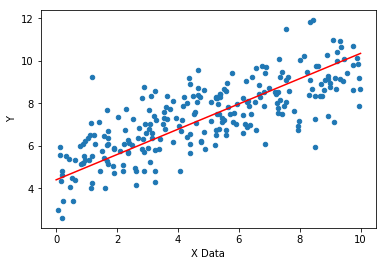

In [84]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y')
plt.plot(brand_new_data,predictions,'r')